In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
import glob

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [3]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/MultiDS/MultiDS.csv', index_col=0) 

In [ ]:
dataset

,Unnamed: 0.1,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,0.0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
1,1.0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
2,2.0,1.000000,342.000000,0.000000e+00,1.000000,342.000000,0.000000,1.000000,342.000000,0.000000,...,0.0,0.0,6.249414,449.603272,122.911136,449.603272,1.510715e+04,0.0,0.0,0
3,3.0,1.963325,342.000000,4.370000e-11,1.977831,342.000000,0.000000,1.992555,342.000000,0.000000,...,0.0,0.0,7.248947,434.759286,120.000074,434.759286,1.440002e+04,0.0,0.0,0
4,4.0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484478,NaN,139.529430,216.337487,5.278723e+04,201.142065,261.793807,58960.193349,531.529316,315.188408,60934.835357,...,0.0,0.0,19291.225722,554.000000,0.000054,554.000000,2.968591e-09,0.0,0.0,2
741522,NaN,18.236551,60.551668,2.065905e+01,34.057247,60.502662,18.848494,160.896284,60.181053,6.847222,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,2
3582238,NaN,143.196467,353.714259,5.877526e+04,228.180560,392.433276,53661.819285,673.835158,425.822548,46865.630088,...,0.0,0.0,1.000000,554.000000,0.000000,554.000000,0.000000e+00,0.0,0.0,2
3322791,NaN,163.862396,449.713386,4.531845e+04,254.478420,430.861632,50117.635608,664.239357,433.656206,49451.071512,...,0.0,0.0,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.0,0.0,2


In [4]:
dataset.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [ ]:
dataset.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,0
1,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,0
2,1.000000,342.0,0.000000e+00,1.000000,342.0,0.0,1.000000,342.0,0.0,1.000000,...,0.0,0.0,6.249414,449.603272,122.911136,449.603272,15107.14730,0.0,0.0,0
3,1.963325,342.0,4.370000e-11,1.977831,342.0,0.0,1.992555,342.0,0.0,1.999253,...,0.0,0.0,7.248947,434.759286,120.000074,434.759286,14400.01777,0.0,0.0,0
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,0


In [5]:
from sklearn.utils import shuffle
dataset = shuffle(dataset, random_state=42)

In [ ]:
dataset

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
692333,181.155907,536.735041,8.230811e+03,213.051703,520.771030,15310.946537,494.797125,457.097309,38479.797950,5211.973025,...,0.000000e+00,0.000000e+00,22455.428592,554.000000,3.051758e-05,554.000000,9.313226e-10,0.000000e+00,0.000000e+00,2
1110159,130.098055,72.247670,2.146196e+01,208.499937,72.357943,20.292472,636.458430,71.660561,27.286306,6355.596396,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,2
347288,1.000085,74.001359,2.174675e-02,1.005603,74.089141,1.418314,1.369439,78.316382,50.430961,3.677610,...,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
46889,1.000021,60.000276,5.030565e-03,1.002121,60.029750,0.691373,1.272095,64.467517,221.002341,10.491322,...,1.430000e-31,0.000000e+00,6.334233,60.000000,9.540000e-07,84.852814,1.020000e-12,4.020000e-29,6.250000e-17,0
2234237,138.769265,356.940453,5.851298e+04,230.114422,353.082651,58878.581599,668.379014,370.026746,57023.098092,6429.478584,...,0.000000e+00,0.000000e+00,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,49.475008,182.501114,6.069926e+04,61.432712,181.301738,59821.719580,80.724626,177.863891,57680.590450,98.217131,...,0.000000e+00,0.000000e+00,2.999968,287.002314,3.069026e+02,296.388813,9.418919e+04,0.000000e+00,0.000000e+00,0
1851809,115.003019,224.234332,5.408693e+04,152.088655,253.157198,58050.237476,379.465211,307.513902,60976.478103,3823.897303,...,0.000000e+00,0.000000e+00,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00,2
131932,3.683327,66.000000,1.820000e-06,3.796751,66.000114,0.007405,3.993153,66.402660,31.721150,14.849908,...,-3.090000e-12,-1.430000e-07,19.804511,66.025390,5.522673e-01,114.841844,2.527318e+02,-1.538267e-01,-1.752075e-02,0
115223,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,1


In [6]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
692333,181.155907,536.735041,8.230811e+03,213.051703,520.771030,15310.946537,494.797125,457.097309,38479.797950,5211.973025,...,1.164153e-10,0.000000e+00,0.000000e+00,22455.428592,554.000000,3.051758e-05,554.000000,9.313226e-10,0.000000e+00,0.000000e+00
1110159,130.098055,72.247670,2.146196e+01,208.499937,72.357943,20.292472,636.458430,71.660561,27.286306,6355.596396,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
347288,1.000085,74.001359,2.174675e-02,1.005603,74.089141,1.418314,1.369439,78.316382,50.430961,3.677610,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
46889,1.000021,60.000276,5.030565e-03,1.002121,60.029750,0.691373,1.272095,64.467517,221.002341,10.491322,...,0.000000e+00,1.430000e-31,0.000000e+00,6.334233,60.000000,9.540000e-07,84.852814,1.020000e-12,4.020000e-29,6.250000e-17
2234237,138.769265,356.940453,5.851298e+04,230.114422,353.082651,58878.581599,668.379014,370.026746,57023.098092,6429.478584,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,49.475008,182.501114,6.069926e+04,61.432712,181.301738,59821.719580,80.724626,177.863891,57680.590450,98.217131,...,9.419386e+04,0.000000e+00,0.000000e+00,2.999968,287.002314,3.069026e+02,296.388813,9.418919e+04,0.000000e+00,0.000000e+00
1851809,115.003019,224.234332,5.408693e+04,152.088655,253.157198,58050.237476,379.465211,307.513902,60976.478103,3823.897303,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,554.000000,0.000000e+00,554.000000,0.000000e+00,0.000000e+00,0.000000e+00
131932,3.683327,66.000000,1.820000e-06,3.796751,66.000114,0.007405,3.993153,66.402660,31.721150,14.849908,...,2.555286e+02,-3.090000e-12,-1.430000e-07,19.804511,66.025390,5.522673e-01,114.841844,2.527318e+02,-1.538267e-01,-1.752075e-02
115223,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
DT_model = DecisionTreeClassifier( random_state = 42)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [ ]:
cf_matrix_DT = confusion_matrix(y_test, y_pred)

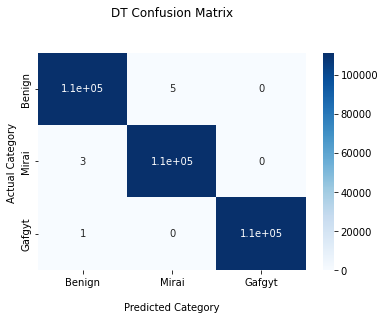

In [ ]:
# Decision tree plot
ax = sns.heatmap(cf_matrix_DT, annot=True, cmap='Blues')

ax.set_title('DT Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
DT_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#TN = cf_matrix_DT[0,0 ]
#FP = cf_matrix_DT[0,1 ]
#FN = cf_matrix_DT[1,0 ]
#TP = cf_matrix_DT[1,1 ]
#DT_Specificity = TN/(TN+FP)
print('Decision Tree Performance Evaluation Results:')
DT_Precision = precision_score(y_test, y_pred, average= None)
DT_F1 = f1_score (y_test, y_pred, average= None)
DT_Recall = recall_score(y_test, y_pred, average= None)
print('(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)')
DT_Accuracy, DT_Precision,  DT_Recall, DT_F1 #, round(DT_Specificity,6)

Decision Tree Performance Evaluation Results:
(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)


(0.99997601630891,
 array([0.99996406, 0.99996396, 1.        ]),
 array([0.99996406, 0.99996396, 1.        ]),
 array([0.99996406, 0.99996396, 1.        ]))

In [ ]:
from io import StringIO


from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()


export_graphviz(DT_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [7]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [8]:
cf_matrix_RF = confusion_matrix(y_test, y_pred)

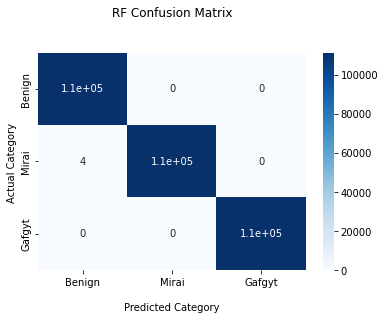

In [ ]:
# Randomforest plot
ax = sns.heatmap(cf_matrix_RF, annot=True, cmap='Blues')

ax.set_title('RF Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])
ax.yaxis.set_ticklabels(['Benign','Mirai','Gafgyt'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
RF_Accuracy = accuracy_score(y_test, y_pred)

In [10]:
#TN = cf_matrix_RF[0,0]
#FP = cf_matrix_RF[0,1]
#FN = cf_matrix_RF[1,0]
#TP = cf_matrix_RF[1,1]
#RF_Specificity = TN/(TN+FP)
print('Random Forest Performance Evaluation Results:')
RF_Precision = precision_score(y_test, y_pred, average= None)
RF_F1 = f1_score (y_test, y_pred, average= None)
RF_Recall = recall_score(y_test, y_pred, average= None)
print('(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)')
RF_Accuracy ,  RF_Precision ,  RF_Recall ,  RF_F1 #, round(RF_Specificity,6)

Random Forest Performance Evaluation Results:
(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)


(0.9999970020386137,
 array([0.99999102, 1.        , 1.        ]),
 array([1.        , 0.99999099, 1.        ]),
 array([0.99999551, 0.9999955 , 1.        ]))

In [ ]:
from yellowbrick.model_selection import learning_curve
 
# Plot the learning curves
print(learning_curve(RF_model, X, y, cv=10, scoring='accuracy'))

In [ ]:
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

In [ ]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred)

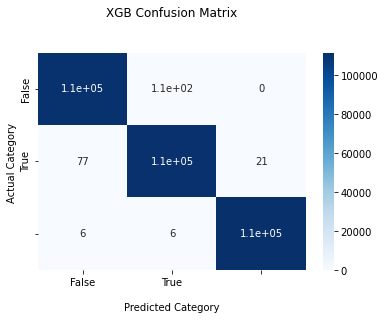

In [ ]:
# XGB plot
ax = sns.heatmap(cf_matrix_XGB, annot=True, cmap='Blues')

ax.set_title('XGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
XGB_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#TN = cf_matrix_XGB[0,0]
#FP = cf_matrix_XGB[0,1]
#FN = cf_matrix_XGB[1,0]
#TP = cf_matrix_XGB[1,1]
#XGB_Specificity = TN/(TN+FP)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred, average= None)
XGB_F1 = f1_score (y_test, y_pred, average= None)
XGB_Recall = recall_score(y_test, y_pred, average= None)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)')
XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1 #, round(XGB_Specificity,6)

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)


(0.999475356757405,
 array([0.99938698, 0.99917391, 0.99986519]),
 array([0.9991798 , 0.99927261, 0.99997303]),
 array([0.99928338, 0.99922326, 0.99991911]))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier()
Ada_model.fit(X_train, y_train)
y_pred = Ada_model.predict(X_test)

In [ ]:
cf_matrix_ADA = confusion_matrix(y_test, y_pred)

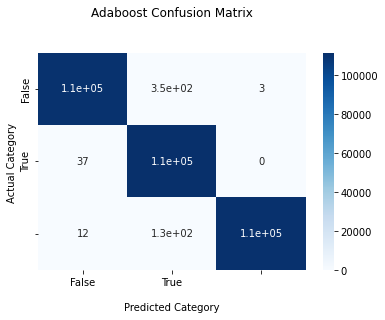

In [ ]:
# Adaboost plot
ax = sns.heatmap(cf_matrix_ADA, annot=True, cmap='Blues')

ax.set_title('Adaboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
ADA_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#TN = cf_matrix_ADA[0,0]
#FP = cf_matrix_ADA[0,1]
#FN = cf_matrix_ADA[1,0]
#TP = cf_matrix_ADA[1,1]
#ADA_Specificity = TN/(TN+FP)
print('Adaboost Performance Evaluation Results:')
ADA_Precision = precision_score(y_test, y_pred, average = None)
ADA_F1 = f1_score (y_test, y_pred, average = None)
ADA_Recall = recall_score(y_test, y_pred, average = None)
print('(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1, ADA_Specificity)')
ADA_Accuracy, ADA_Precision, ADA_Recall, ADA_F1 #, ADA_Specificity,6)

Adaboost Performance Evaluation Results:
(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1, ADA_Specificity)


(0.9984080825038973,
 array([0.99955689, 0.99572176, 0.99997298]),
 array([0.99679854, 0.99966822, 0.99874947]),
 array([0.99817581, 0.99769109, 0.99936085]))

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
LGBM_model.fit(X_train, y_train)
y_pred = LGBM_model.predict(X_test)

In [ ]:
cf_matrix_LGB = confusion_matrix(y_test, y_pred)

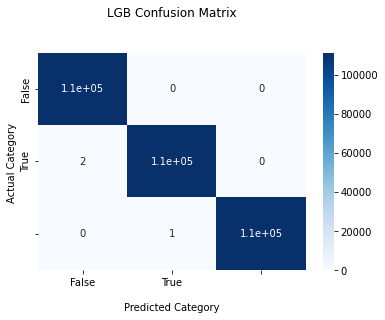

In [ ]:
# LGB plot
ax = sns.heatmap(cf_matrix_LGB, annot=True, cmap='Blues')

ax.set_title('LGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
LGB_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('LGB Performance Evaluation Results:')
LGB_Precision = precision_score(y_test, y_pred, average = None)
LGB_F1 = f1_score (y_test, y_pred, average = None)
LGB_Recall = recall_score(y_test, y_pred, average = None)
print('(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1, LGB_Specificity)')
LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1

LGB Performance Evaluation Results:
(LGB_Accuracy, LGB_Precision, LGB_Recall, LGB_F1, LGB_Specificity)


(0.9999910061158412,
 array([0.999982, 0.999991, 1.      ]),
 array([1.        , 0.99998201, 0.99999101]),
 array([0.999991  , 0.99998651, 0.99999551]))

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

Learning rate set to 0.114212
0:	learn: 0.8862676	total: 3.52s	remaining: 58m 41s
1:	learn: 0.7351078	total: 7.49s	remaining: 1h 2m 15s
2:	learn: 0.6196632	total: 11.3s	remaining: 1h 2m 27s
3:	learn: 0.5284990	total: 15.5s	remaining: 1h 4m 25s
4:	learn: 0.4547415	total: 19.5s	remaining: 1h 4m 43s
5:	learn: 0.3938405	total: 24.4s	remaining: 1h 7m 23s
6:	learn: 0.3427664	total: 26.6s	remaining: 1h 2m 50s
7:	learn: 0.2997542	total: 28.6s	remaining: 59m 11s
8:	learn: 0.2630124	total: 30.7s	remaining: 56m 19s
9:	learn: 0.2315334	total: 32.8s	remaining: 54m 3s
10:	learn: 0.2043387	total: 34.8s	remaining: 52m 12s
11:	learn: 0.1807218	total: 37.3s	remaining: 51m 8s
12:	learn: 0.1601734	total: 39.3s	remaining: 49m 45s
13:	learn: 0.1421736	total: 41.3s	remaining: 48m 31s
14:	learn: 0.1264270	total: 43.4s	remaining: 47m 27s
15:	learn: 0.1126586	total: 45.5s	remaining: 46m 37s
16:	learn: 0.1006239	total: 47.6s	remaining: 45m 52s
17:	learn: 0.0899517	total: 50.1s	remaining: 45m 32s
18:	learn: 0.080

In [ ]:
cf_matrix_Cboost = confusion_matrix(y_test, y_pred)

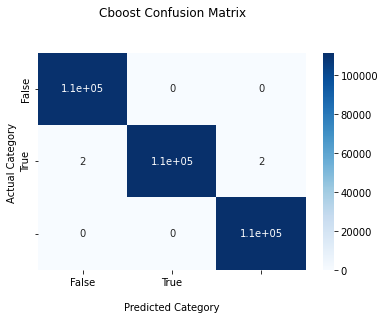

In [ ]:
# CATB plot
ax = sns.heatmap(cf_matrix_Cboost, annot=True, cmap='Blues')

ax.set_title('Cboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
Cboost_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Cboost Performance Evaluation Results:')
Cboost_F1 = f1_score (y_test, y_pred, average = None)
Cboost_Recall = recall_score(y_test, y_pred, average = None)
Cboost_Precision = precision_score(y_test, y_pred, average = None)
print('(Cboost_Accuracy, Cboost_Precision,  Cboost_Recall, Cboost_F1, Cboost_Specificity)')
Cboost_Accuracy, Cboost_Precision, Cboost_Recall, Cboost_F1

Cboost Performance Evaluation Results:
(Cboost_Accuracy, Cboost_Precision,  Cboost_Recall, Cboost_F1, Cboost_Specificity)


(0.999988008154455,
 array([0.99998194, 1.        , 0.99998208]),
 array([1.        , 0.99996404, 1.        ]),
 array([0.99999097, 0.99998202, 0.99999104]))